### Import Essential Modules

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import graphviz
%matplotlib inline

In [7]:
df = pd.read_csv('dataset_sdn.csv')
df.head(10)

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0
5,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1402,0,0.0,0.0,0
6,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,4,3665,3413,0,0.0,0.0,0
7,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,1,3775,1492,0,0.0,0.0,0
8,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,2,3845,1402,0,0.0,0.0,0
9,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,4,354583059,4295,16578,0.0,16578.0,0


### Data Preprocessing

#### Dataset Dimensions

In [8]:
print("This Dataset has {} rows and {} columns".format(df.shape[0], df.shape[1]))

This Dataset has 104345 rows and 23 columns


#### Concise summary of dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104345 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           104345 non-null  int64  
 1   switch       104345 non-null  int64  
 2   src          104345 non-null  object 
 3   dst          104345 non-null  object 
 4   pktcount     104345 non-null  int64  
 5   bytecount    104345 non-null  int64  
 6   dur          104345 non-null  int64  
 7   dur_nsec     104345 non-null  int64  
 8   tot_dur      104345 non-null  float64
 9   flows        104345 non-null  int64  
 10  packetins    104345 non-null  int64  
 11  pktperflow   104345 non-null  int64  
 12  byteperflow  104345 non-null  int64  
 13  pktrate      104345 non-null  int64  
 14  Pairflow     104345 non-null  int64  
 15  Protocol     104345 non-null  object 
 16  port_no      104345 non-null  int64  
 17  tx_bytes     104345 non-null  int64  
 18  rx_bytes     104345 non-

#### Descriptive statistics of dataset

In [10]:
df.describe()

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
count,104345.000000,104345.000000,104345.000000,1.043450e+05,104345.000000,1.043450e+05,1.043450e+05,104345.000000,104345.000000,104345.000000,1.043450e+05,104345.000000,104345.000000,104345.000000,1.043450e+05,1.043450e+05,104345.000000,103839.000000,103839.000000,104345.000000
mean,17927.514169,4.214260,52860.954746,3.818660e+07,321.497398,4.613880e+08,3.218865e+11,5.654234,5200.383468,6381.715291,4.716150e+06,212.210676,0.600987,2.331094,9.325264e+07,9.328039e+07,998.899756,1003.811420,2007.578742,0.390857
std,11977.642655,1.956327,52023.241460,4.877748e+07,283.518232,2.770019e+08,2.834029e+11,2.950036,5257.001450,7404.777808,7.560116e+06,246.855123,0.489698,1.084333,1.519380e+08,1.330004e+08,2423.471618,2054.887034,3144.437173,0.487945
min,2488.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,2.000000,4.000000,-130933.000000,-1.464426e+08,-4365.000000,0.000000,1.000000,2.527000e+03,8.560000e+02,0.000000,0.000000,0.000000,0.000000
25%,7098.000000,3.000000,808.000000,7.957600e+04,127.000000,2.340000e+08,1.270000e+11,3.000000,1943.000000,29.000000,2.842000e+03,0.000000,0.000000,1.000000,4.743000e+03,3.539000e+03,0.000000,0.000000,0.000000,0.000000
50%,11905.000000,4.000000,42828.000000,6.471930e+06,251.000000,4.180000e+08,2.520000e+11,5.000000,3024.000000,8305.000000,5.521680e+05,276.000000,1.000000,2.000000,4.219610e+06,1.338339e+07,0.000000,0.000000,4.000000,0.000000
75%,29952.000000,5.000000,94796.000000,7.620354e+07,412.000000,7.030000e+08,4.130000e+11,7.000000,7462.000000,10017.000000,9.728112e+06,333.000000,1.000000,3.000000,1.356398e+08,1.439277e+08,251.000000,557.000000,3838.000000,1.000000
max,42935.000000,10.000000,260006.000000,1.471280e+08,1881.000000,9.990000e+08,1.880000e+12,17.000000,25224.000000,19190.000000,1.495387e+07,639.000000,1.000000,5.000000,1.269982e+09,9.905962e+08,20580.000000,16577.000000,20580.000000,1.000000


#### heatmap of missing values

<Axes: >

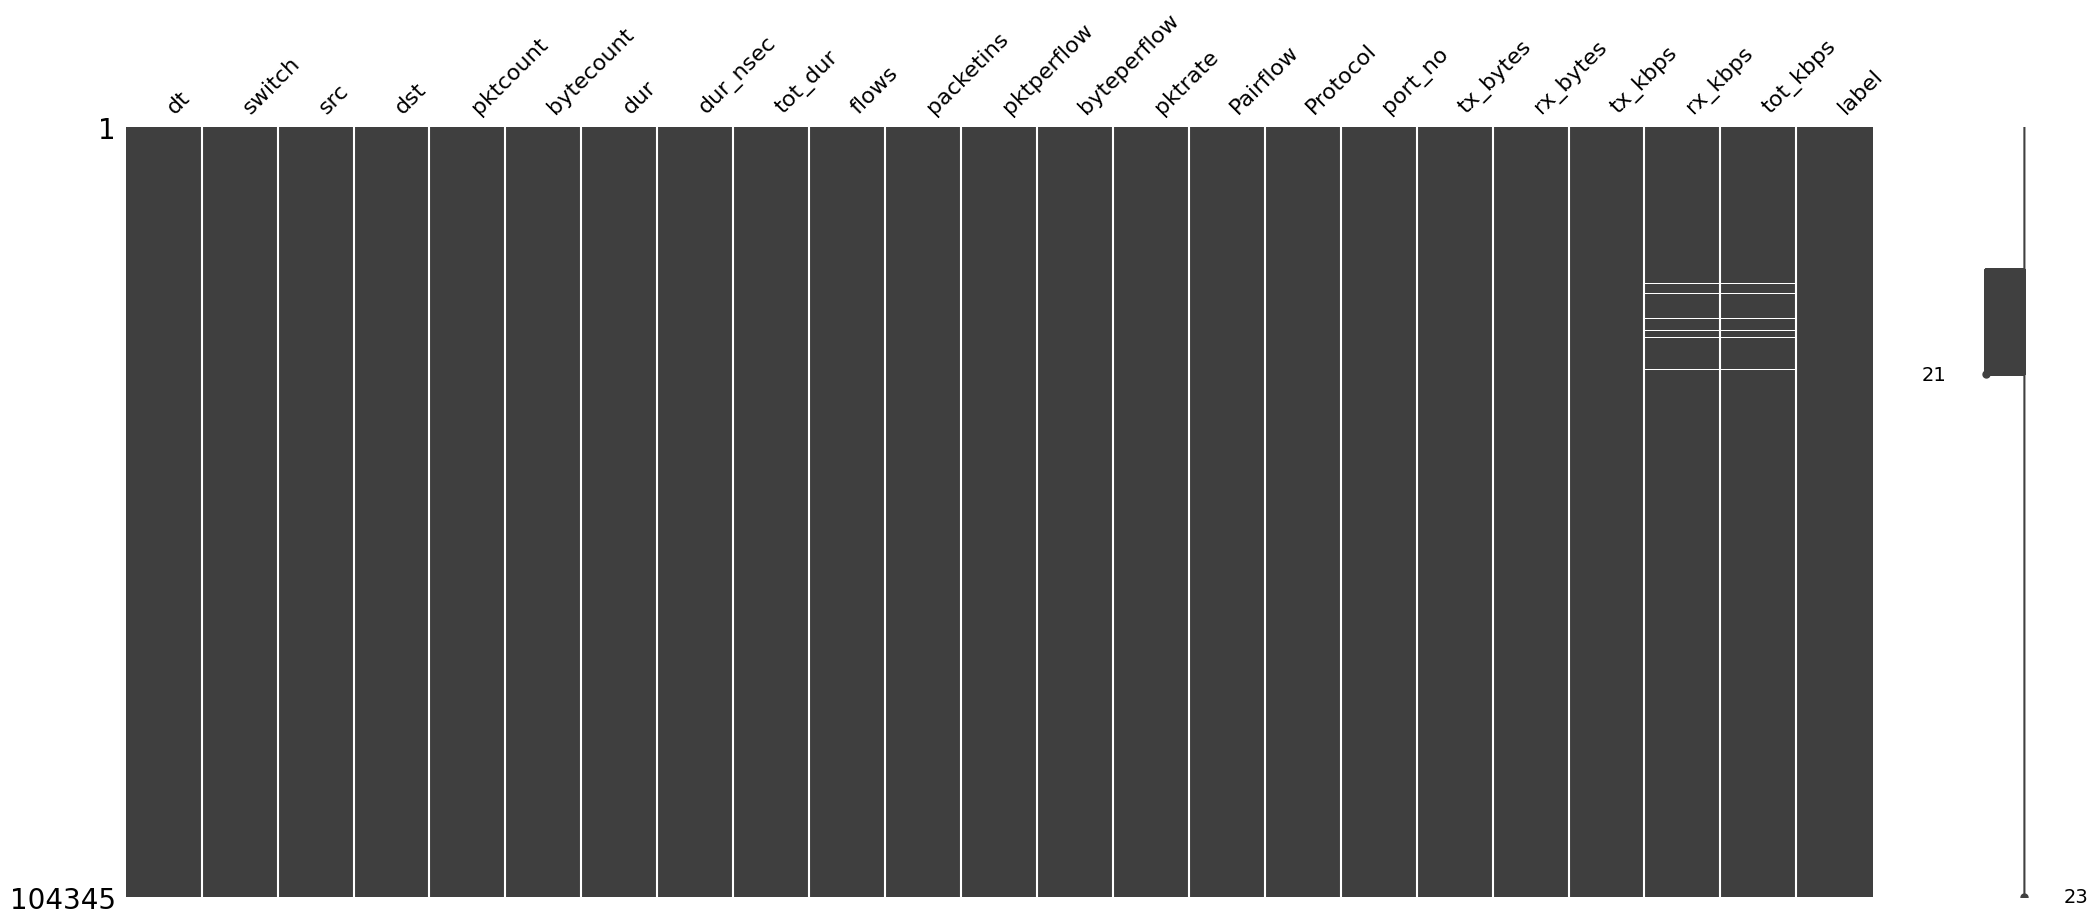

In [11]:
msno.matrix(df)

#### Count of null values in each feature 

In [12]:
df.isnull().sum()

dt               0
switch           0
src              0
dst              0
pktcount         0
bytecount        0
dur              0
dur_nsec         0
tot_dur          0
flows            0
packetins        0
pktperflow       0
byteperflow      0
pktrate          0
Pairflow         0
Protocol         0
port_no          0
tx_bytes         0
rx_bytes         0
tx_kbps          0
rx_kbps        506
tot_kbps       506
label            0
dtype: int64

In [13]:
(df.isnull().sum()/df.isnull().count())*100

dt             0.00000
switch         0.00000
src            0.00000
dst            0.00000
pktcount       0.00000
bytecount      0.00000
dur            0.00000
dur_nsec       0.00000
tot_dur        0.00000
flows          0.00000
packetins      0.00000
pktperflow     0.00000
byteperflow    0.00000
pktrate        0.00000
Pairflow       0.00000
Protocol       0.00000
port_no        0.00000
tx_bytes       0.00000
rx_bytes       0.00000
tx_kbps        0.00000
rx_kbps        0.48493
tot_kbps       0.48493
label          0.00000
dtype: float64

#### Drop rows with null values

In [14]:
df.dropna(inplace=True)

#### Info after handling Null Values

In [15]:
print(df.isnull().sum())
print("This Dataframe has {} rows and {} columns after removing null values".format(df.shape[0], df.shape[1]))

dt             0
switch         0
src            0
dst            0
pktcount       0
bytecount      0
dur            0
dur_nsec       0
tot_dur        0
flows          0
packetins      0
pktperflow     0
byteperflow    0
pktrate        0
Pairflow       0
Protocol       0
port_no        0
tx_bytes       0
rx_bytes       0
tx_kbps        0
rx_kbps        0
tot_kbps       0
label          0
dtype: int64
This Dataframe has 103839 rows and 23 columns after removing null values


#### Distribution of Target Class

In [16]:
malign = df[df['label'] == 1]
benign = df[df['label'] == 0]

print('Number of DDOS attacks that has occured :',round((len(malign)/df.shape[0])*100,2),'%')
print('Number of DDOS attacks that has not occured :',round((len(benign)/df.shape[0])*100,2),'%')

Number of DDOS attacks that has occured : 39.01 %
Number of DDOS attacks that has not occured : 60.99 %


#### Barplot of Target Class

Text(0, 0.5, 'Frequency %')

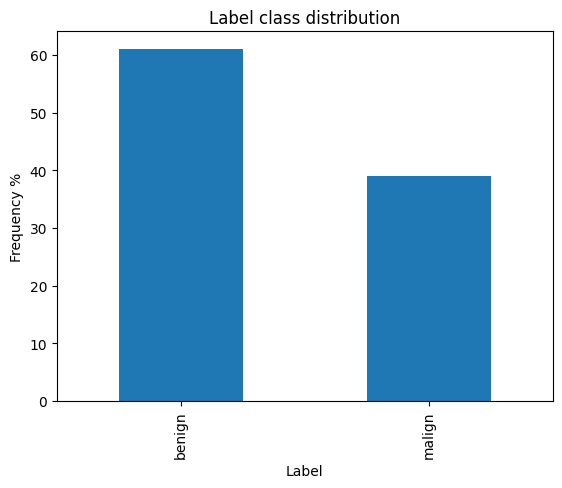

In [17]:
# Let's plot the Label class against the Frequency
labels = ['benign','malign']
classes = pd.value_counts(df['label'], sort = True) / df['label'].count() *100
classes.plot(kind = 'bar')
plt.title("Label class distribution")
plt.xticks(range(2), labels)
plt.xlabel("Label")
plt.ylabel("Frequency %")

#### Pairplot of select features

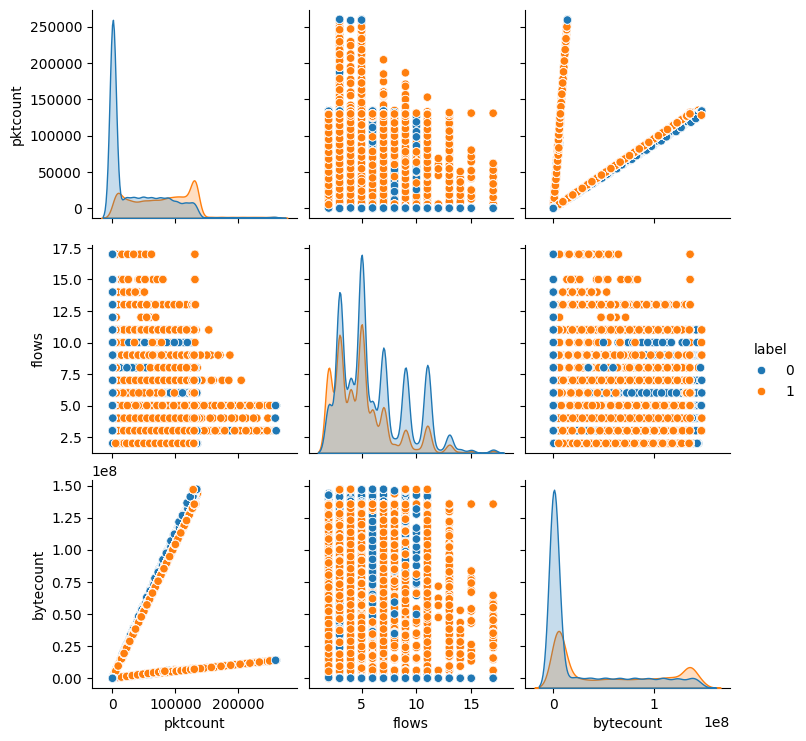

In [18]:
sns.pairplot(df,hue="label",vars=['pktcount','flows','bytecount'])

#### Columns in the dataset

In [19]:
df.columns

Index(['dt', 'switch', 'src', 'dst', 'pktcount', 'bytecount', 'dur',
       'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow',
       'byteperflow', 'pktrate', 'Pairflow', 'Protocol', 'port_no', 'tx_bytes',
       'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'label'],
      dtype='object')

#### Unique values in each column

In [20]:
print(df.apply(lambda col: col.unique()))

dt             [11425, 11605, 11455, 11515, 9906, 11335, 1157...
switch                           [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
src            [10.0.0.1, 10.0.0.2, 10.0.0.4, 10.0.0.10, 10.0...
dst            [10.0.0.8, 10.0.0.7, 10.0.0.3, 10.0.0.5, 10.0....
pktcount       [45304, 126395, 90333, 103866, 85676, 32914, 4...
bytecount      [48294064, 134737070, 96294978, 110721156, 913...
dur            [100, 280, 200, 230, 190, 73, 10, 250, 80, 260...
dur_nsec       [716000000, 734000000, 744000000, 747000000, 7...
tot_dur        [101000000000.0, 281000000000.0, 201000000000....
flows          [3, 2, 4, 5, 6, 7, 8, 11, 9, 10, 13, 15, 17, 1...
packetins      [1943, 1931, 1790, 1306, 1910, 2242, 2175, 110...
pktperflow     [13535, 13531, 13534, 13533, 13306, 13385, 0, ...
byteperflow    [14428310, 14424046, 14427244, 14426178, 14184...
pktrate        [451, 443, 446, 0, 288, 450, 448, 449, 455, 14...
Pairflow                                                  [0, 1]
Protocol                 

#### Numerical Features

In [21]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print("The number of numerical features is",len(numerical_features),"and they are : \n",numerical_features)

The number of numerical features is 20 and they are : 
 ['dt', 'switch', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow', 'byteperflow', 'pktrate', 'Pairflow', 'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'label']


#### Categorical Features

In [22]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
print("The number of categorical features is",len(categorical_features),"and they are : \n",categorical_features)

The number of categorical features is 3 and they are : 
 ['src', 'dst', 'Protocol']


#### Number of Unique values in the numerical features 

In [23]:
# number of unique values in each numerical variable
df[numerical_features].nunique(axis=0)

dt               858
switch            10
pktcount        9044
bytecount       9270
dur              840
dur_nsec        1000
tot_dur         4183
flows             15
packetins        168
pktperflow      2092
byteperflow     2793
pktrate          446
Pairflow           2
port_no            5
tx_bytes       12257
rx_bytes       11623
tx_kbps         1800
rx_kbps         1730
tot_kbps        2259
label              2
dtype: int64

#### Discrete numerical features

In [24]:
#discrete numerical features 
discrete_feature = [feature for feature in numerical_features if df[feature].nunique()<=15 and feature != 'label']
print("The number of discrete features is",len(discrete_feature),"and they are : \n",discrete_feature)

The number of discrete features is 4 and they are : 
 ['switch', 'flows', 'Pairflow', 'port_no']


In [25]:
df[discrete_feature].head(10)

,switch,flows,Pairflow,port_no
0,1,3,0,3
1,1,2,0,4
2,1,3,0,1
3,1,3,0,2
4,1,3,0,3
5,1,3,0,1
6,1,3,0,4
7,1,3,0,1
8,1,3,0,2
9,1,3,0,4


#### Continuous features

In [26]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature + ['label']]
print("The number of continuous_feature features is",len(continuous_feature),"and they are : \n",continuous_feature)

The number of continuous_feature features is 15 and they are : 
 ['dt', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur', 'packetins', 'pktperflow', 'byteperflow', 'pktrate', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps']


### Exploratory Data Analysis

#### Plotting function definition 

In [27]:
def countplot_distribution(col):
    sns.set_theme(style="darkgrid")
    sns.countplot(y=col, data=df).set(title = 'Distribution of ' + col)

def histplot_distribution(col):
    sns.set_theme(style="darkgrid")
    sns.histplot(data=df,x=col, kde=True,color="red").set(title = 'Distribution of ' + col)

#### Visualize the distribution of Categorical features

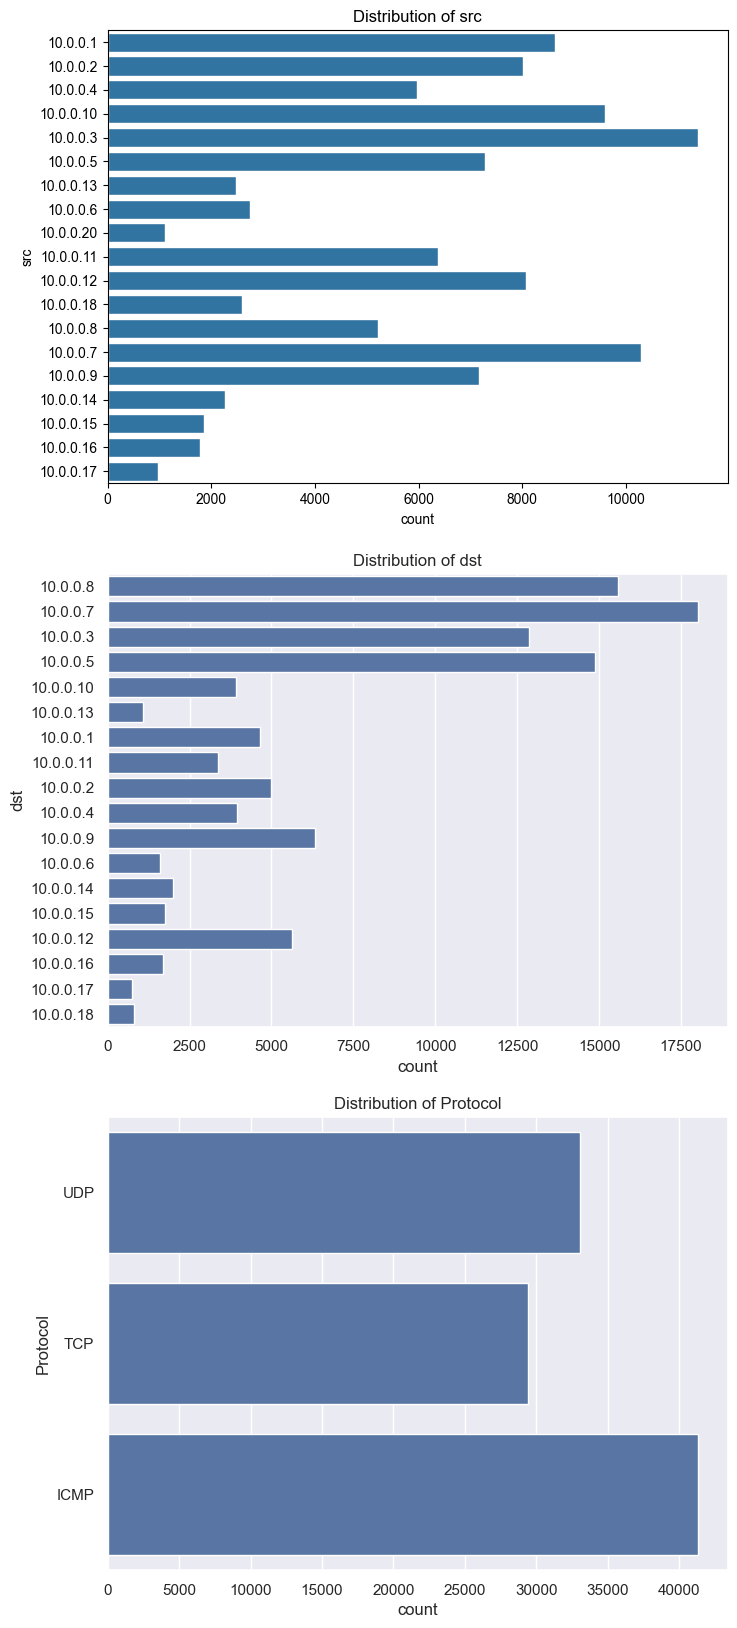

In [28]:
## Lets analyse the categorical values by creating histograms to understand the distribution
f = plt.figure(figsize=(8,20))
for i in range(len(categorical_features)):
    f.add_subplot(len(categorical_features), 1, i+1)
    countplot_distribution(categorical_features[i])
plt.show()

#### Visualize the quartiles of categorical features wrt total duration

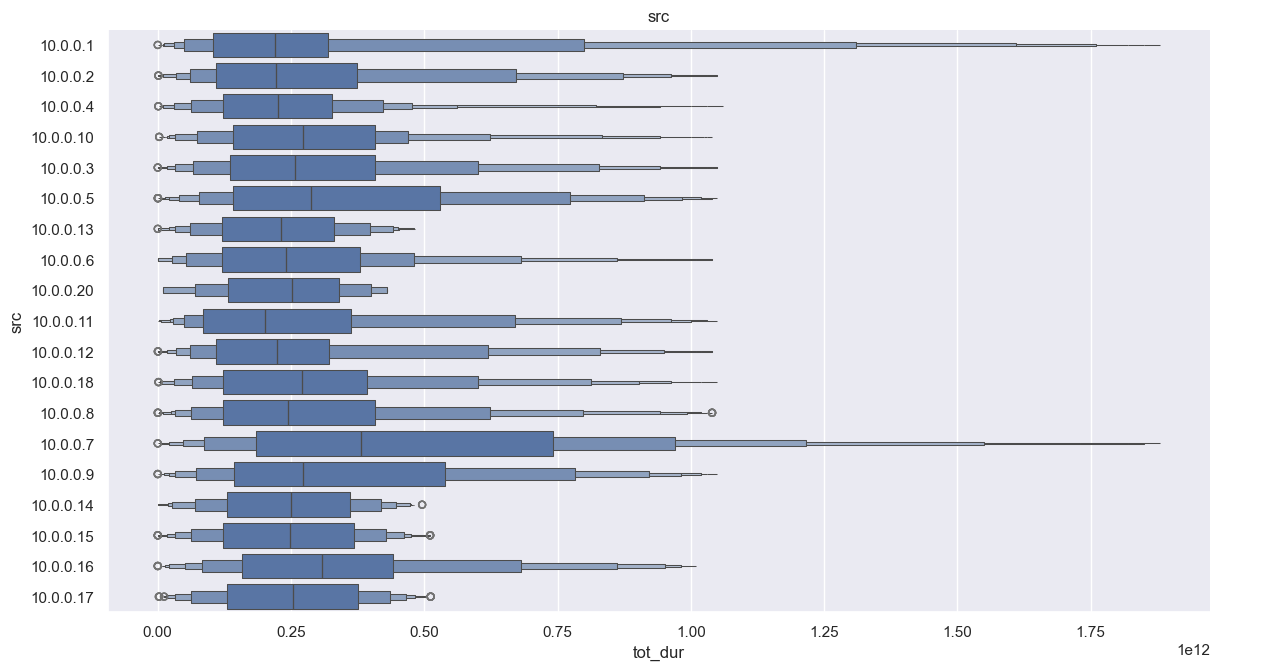

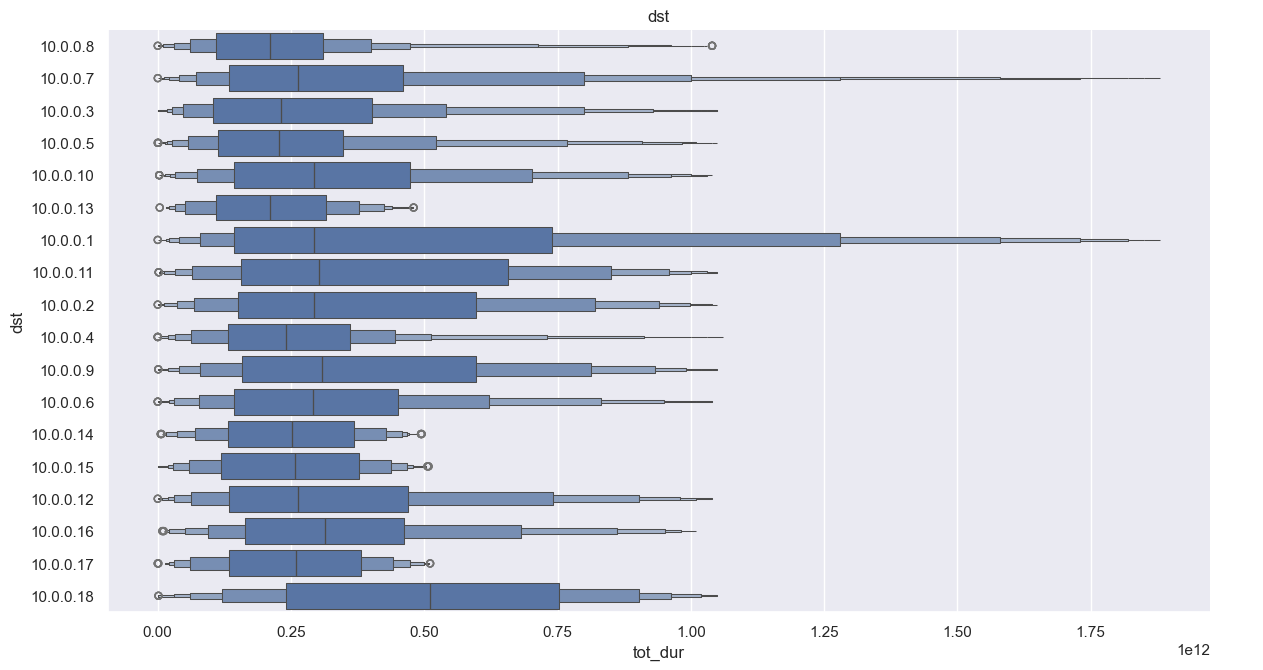

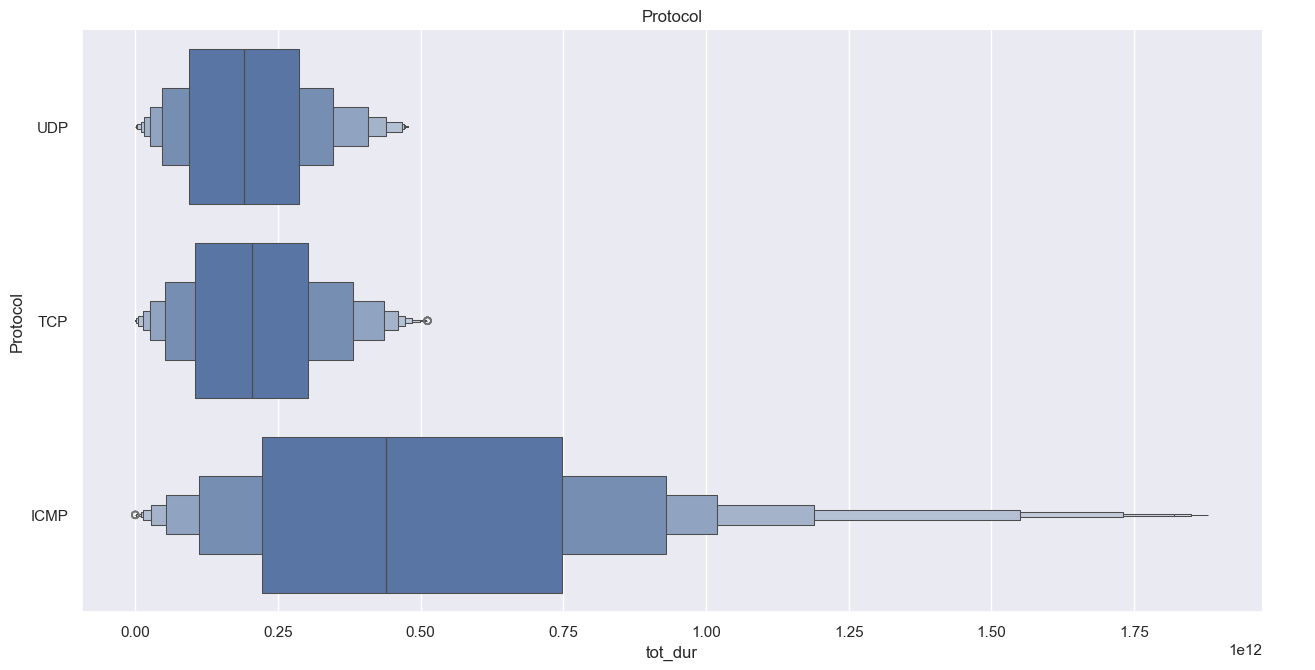

In [29]:
for i in range(len(categorical_features)):
    g = sns.catplot(data=df,x="tot_dur",y=categorical_features[i],kind="boxen").set(title = categorical_features[i])
    g.fig.set_figheight(7)
    g.fig.set_figwidth(15)

#### Visualize the distribution of continuous features

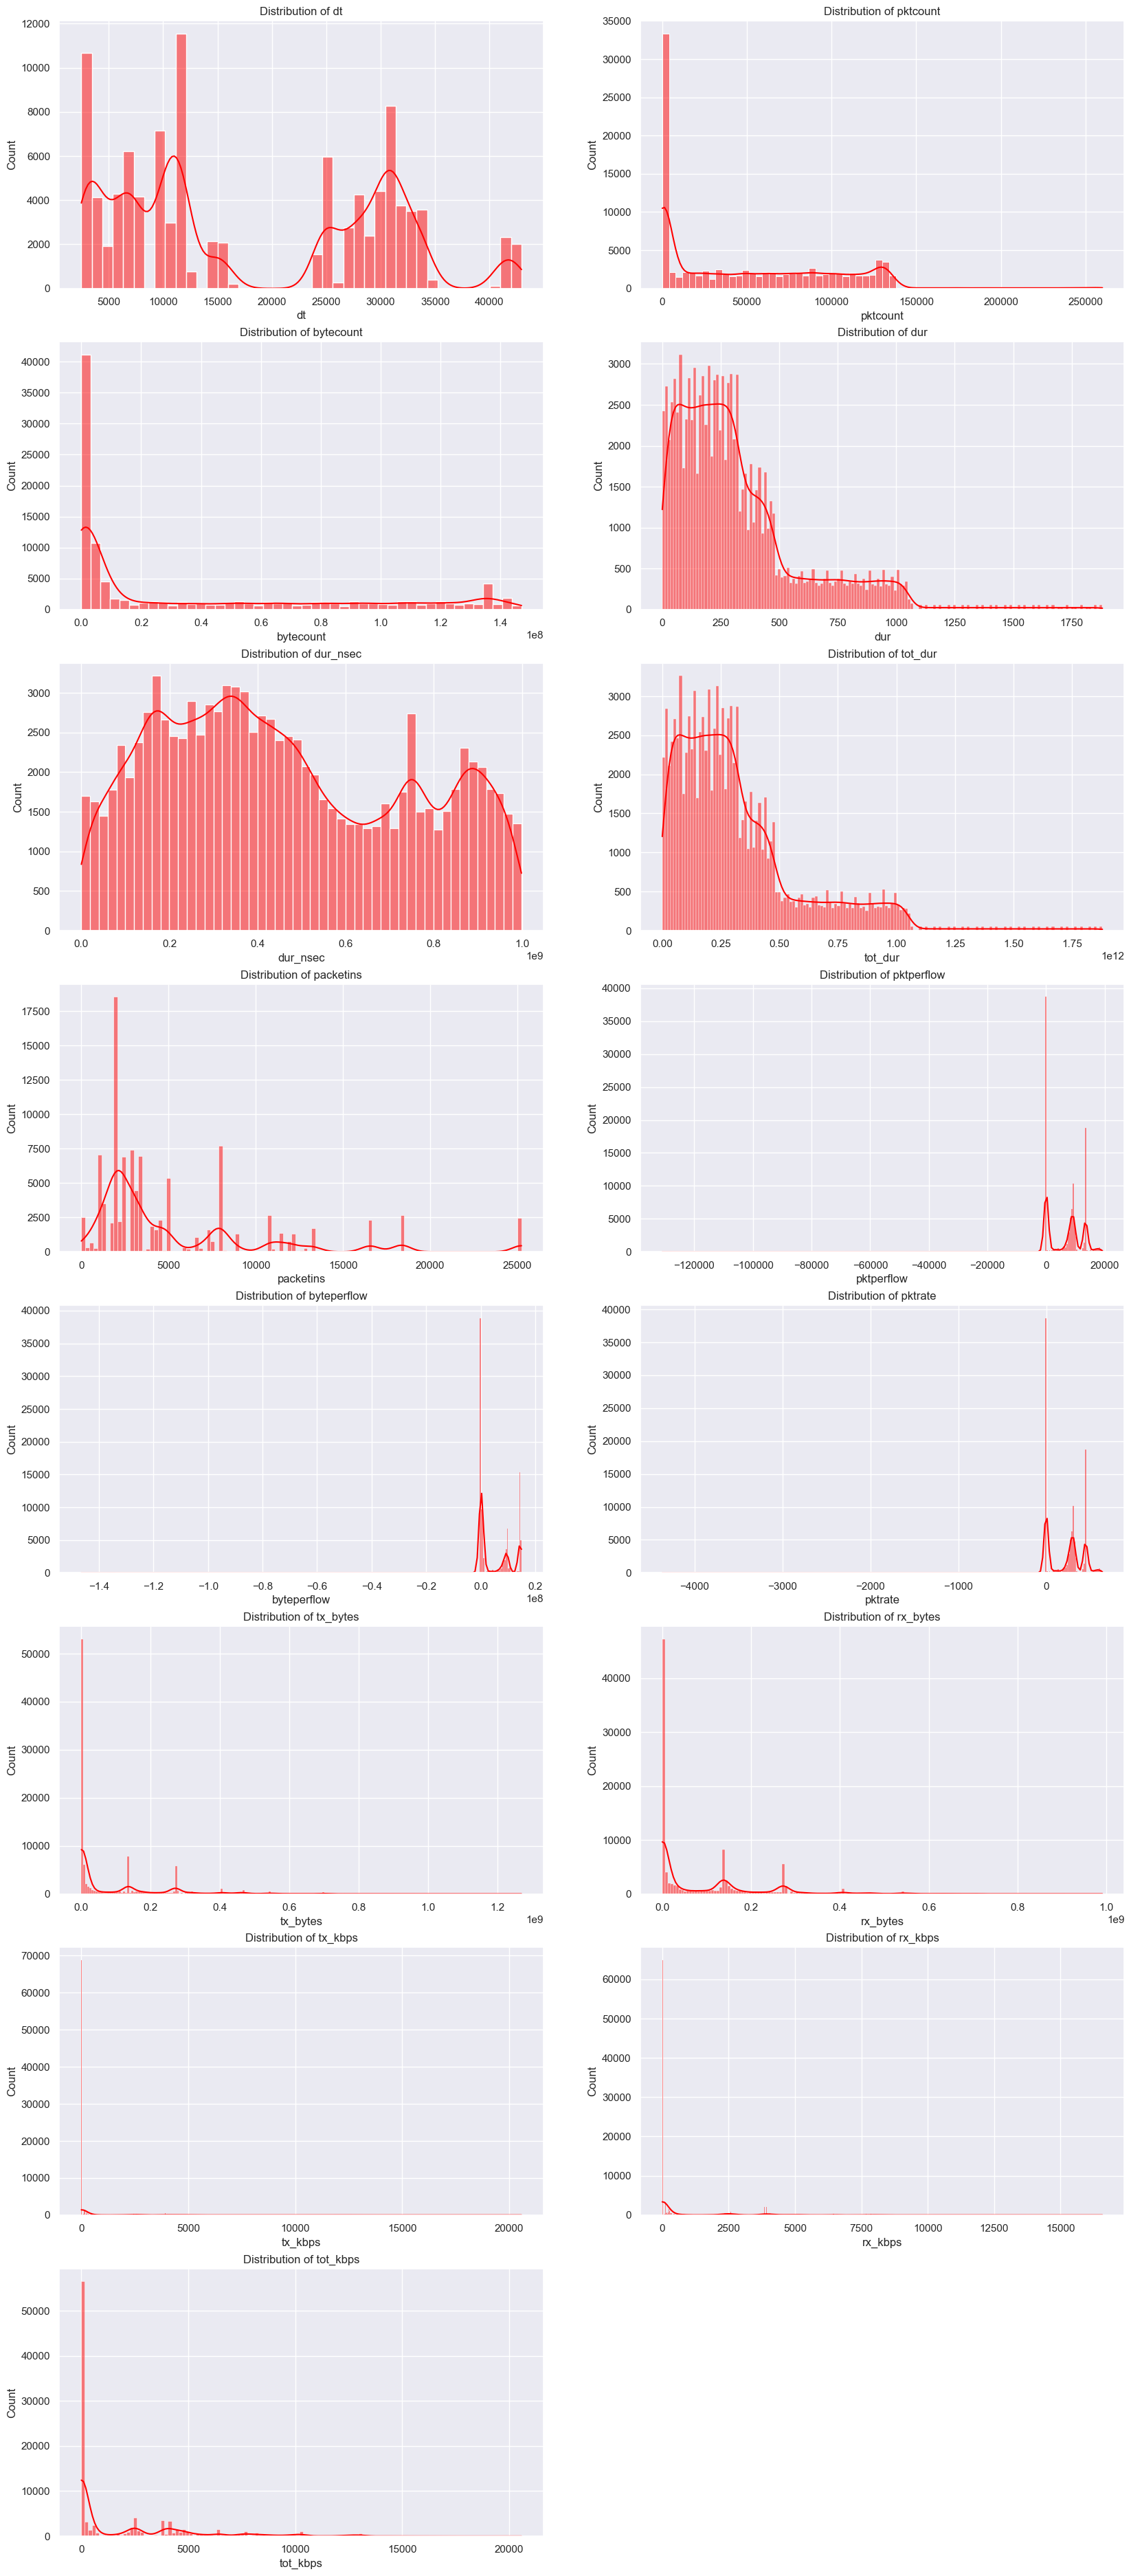

In [30]:
## Lets analyse the continuous values by creating histograms to understand the distribution
f = plt.figure(figsize=(20,90))
for i in range(len(continuous_feature)):
    f.add_subplot(len(continuous_feature), 2, i+1)
    histplot_distribution(continuous_feature[i])
plt.show()

#### Visualize the distribution of continuous features wrt packet count, protocol and type of attack

<Figure size 2000x2000 with 0 Axes>

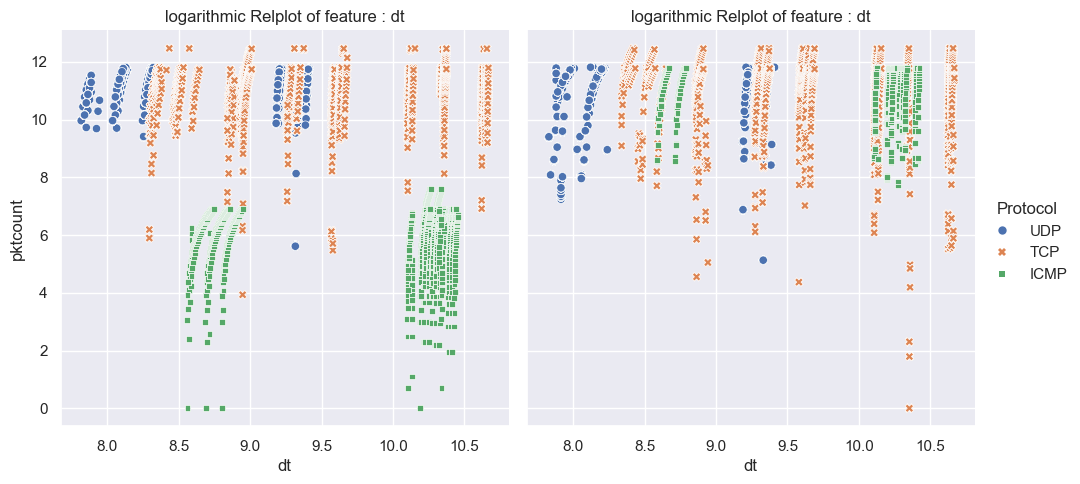

<Figure size 2000x2000 with 0 Axes>

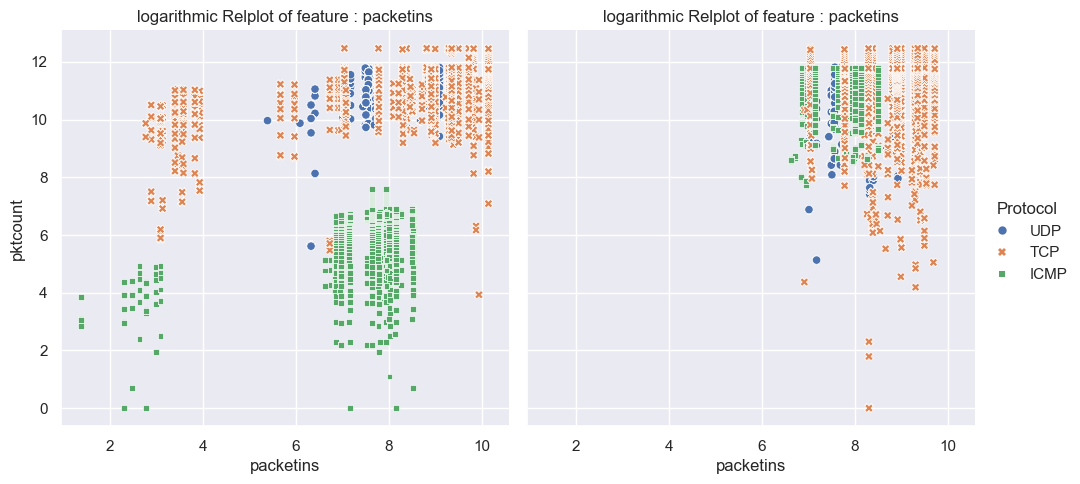

<Figure size 2000x2000 with 0 Axes>

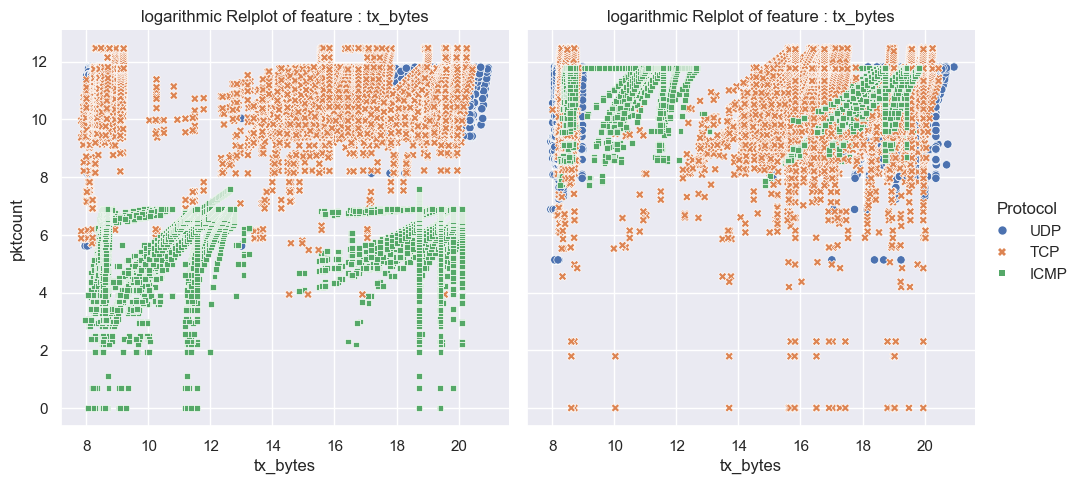

<Figure size 2000x2000 with 0 Axes>

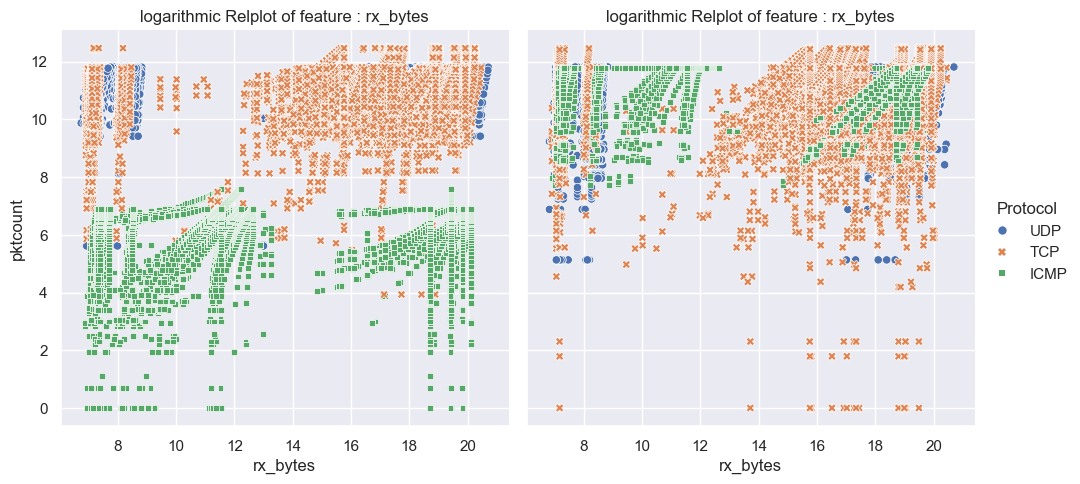

In [31]:
## Relplot of log(variable)
import warnings
warnings.filterwarnings("ignore")
for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['pktcount']=np.log(data['pktcount'])
        plt.figure(figsize=(20,20))
        sns.relplot(data=data, x=data[feature],y=data['pktcount'],hue="Protocol",style="Protocol",
                    col="label",kind="scatter").set(title="logarithmic Relplot of feature : " + feature)

#### Visualize the distribution of numerical discrete features

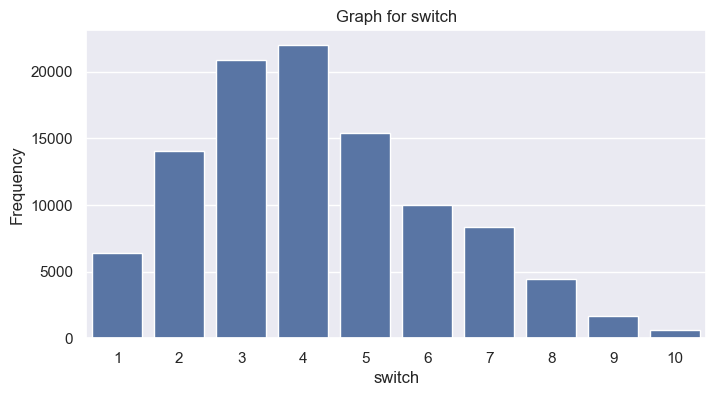

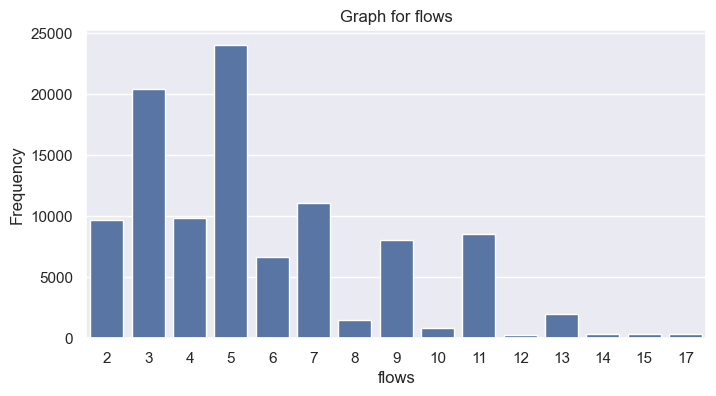

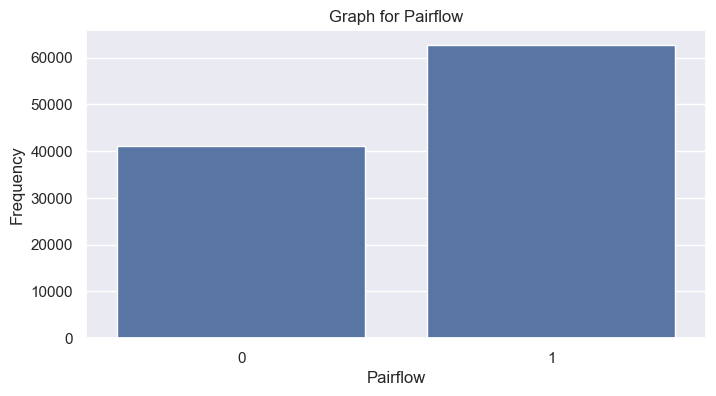

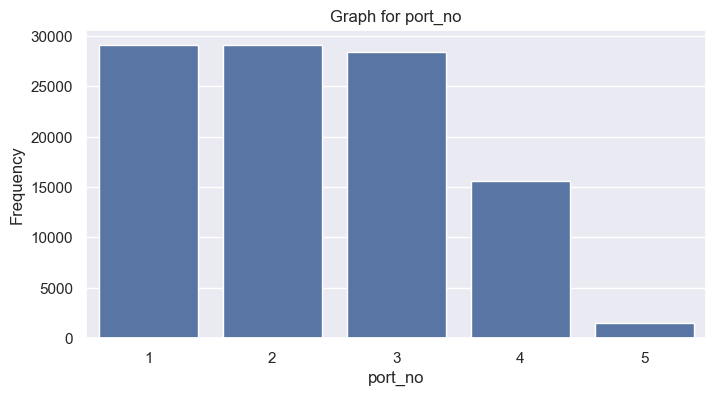

In [32]:
for feature in discrete_feature:
    plt.figure(figsize=(8,4))
    cat_num = df[feature].value_counts()
    sns.barplot(x=cat_num.index, y = cat_num).set(title = "Graph for "+feature, ylabel="Frequency")
    plt.show()

In [33]:
def get_percentage_malign_protocols():
    arr = [x for x, y in zip(df['Protocol'], df['label']) if y == 1]
    perc_arr = []
    for i in ['UDP','TCP','ICMP']:
        perc_arr.append(arr.count(i)/len(arr) *100)
    return perc_arr

#### Distribution of protocols for malign attacks

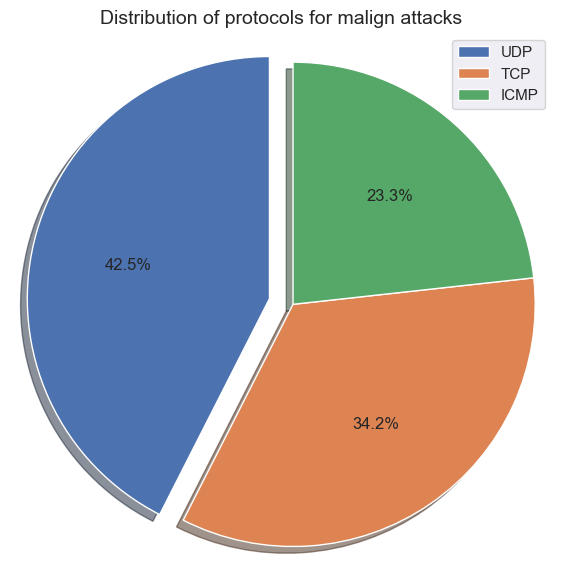

In [34]:
fig1, ax1 = plt.subplots(figsize=[7,7])
ax1.pie(get_percentage_malign_protocols(), explode=(0.1, 0, 0), autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
ax1.legend(['UDP', 'TCP', 'ICMP'],loc="best")
plt.title('Distribution of protocols for malign attacks',fontsize = 14)
plt.show()

#### Checking for outliers in Packet count feature

Text(0.5, 1.0, 'Boxplot, Packet count for different protocols')

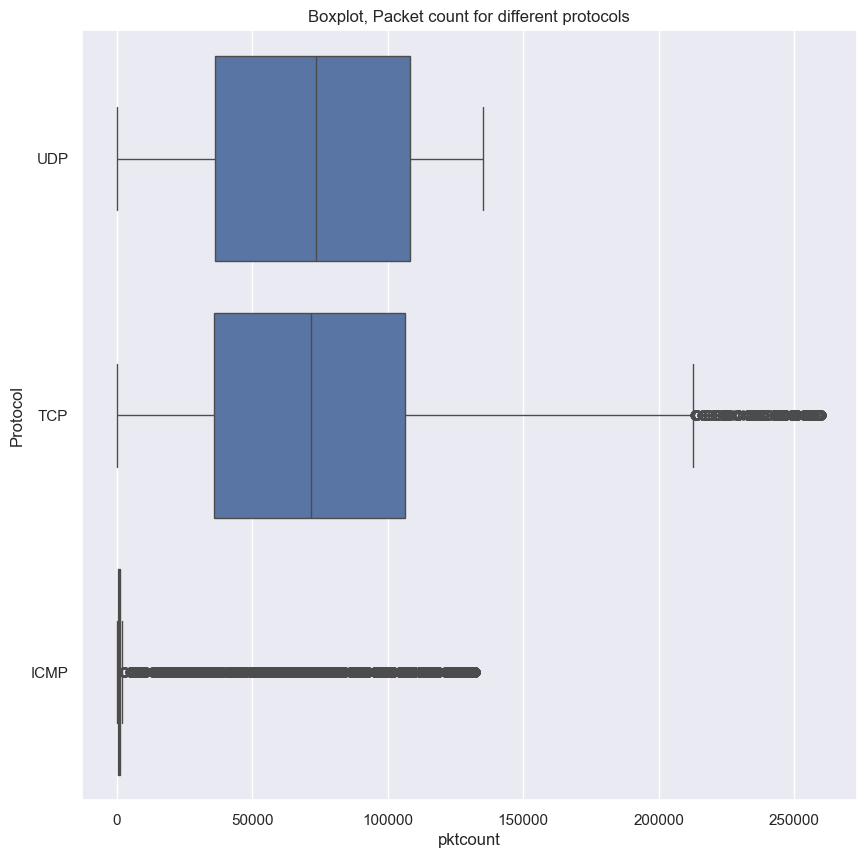

In [35]:
fig, ax = plt.subplots(figsize=[10, 10])
sns.boxplot(
    data=df,
    x='pktcount',
    y='Protocol'
)
ax.set_title('Boxplot, Packet count for different protocols')

#### Heat map of correlation of features

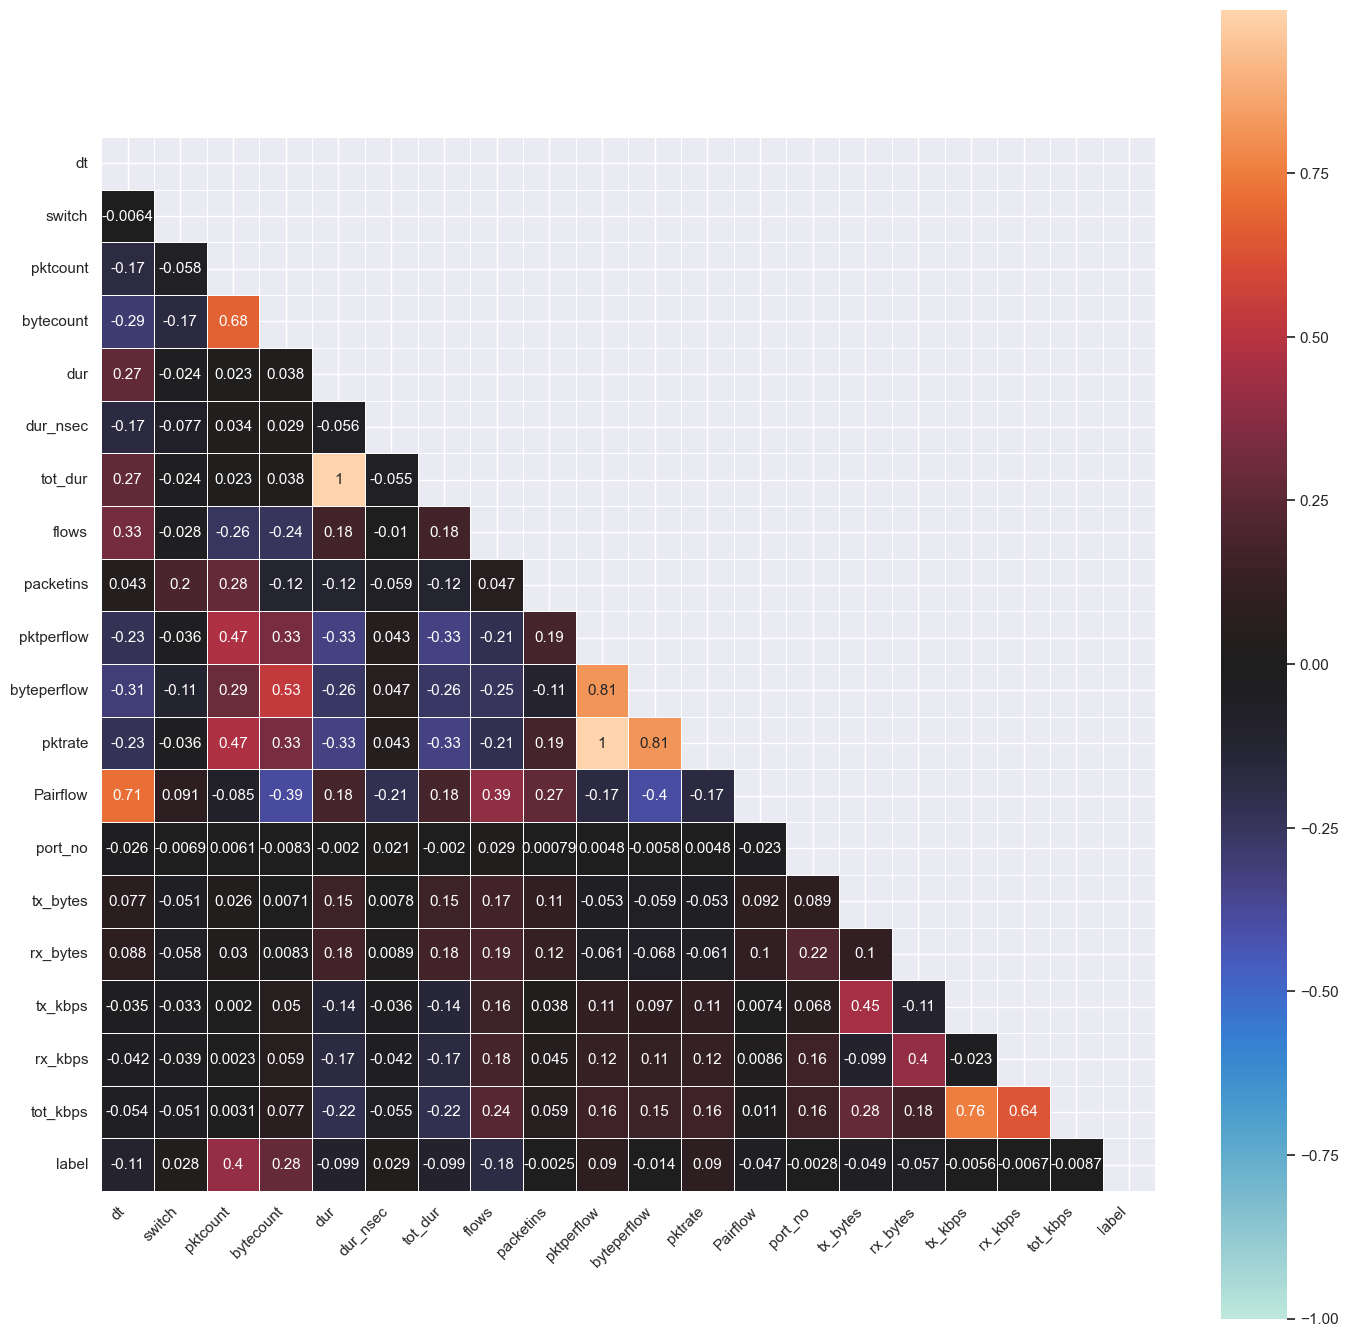

In [37]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
correlation_matrix = df.select_dtypes(include='number').corr()

fig = plt.figure(figsize=(17, 17))
mask = np.zeros_like(correlation_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

sns.set_theme(style="darkgrid")
ax = sns.heatmap(
    correlation_matrix,
    square=True,
    annot=True,
    center=0,
    vmin=-1,
    linewidths=0.5,
    annot_kws={"size": 11},
    mask=mask
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [38]:
print("Features which need to be encoded are : \n" ,categorical_features)

Features which need to be encoded are : 
 ['src', 'dst', 'Protocol']


### Encoding categorical features

In [39]:
df = pd.get_dummies(df, columns=categorical_features,drop_first=True)
print("This Dataframe has {} rows and {} columns after encoding".format(df.shape[0], df.shape[1]))

This Dataframe has 103839 rows and 57 columns after encoding


In [40]:
#dataframe after encoding
df.head(10)

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,...,dst_10.0.0.2,dst_10.0.0.3,dst_10.0.0.4,dst_10.0.0.5,dst_10.0.0.6,dst_10.0.0.7,dst_10.0.0.8,dst_10.0.0.9,Protocol_TCP,Protocol_UDP
0,11425,1,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,...,False,False,False,False,False,False,True,False,False,True
1,11605,1,126395,134737070,280,734000000,2.810000e+11,2,1943,13531,...,False,False,False,False,False,False,True,False,False,True
2,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,False,False,False,False,False,False,True,False,False,True
3,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,False,False,False,False,False,False,True,False,False,True
4,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,False,False,False,False,False,False,True,False,False,True
5,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,False,False,False,False,False,False,True,False,False,True
6,11425,1,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,...,False,False,False,False,False,False,True,False,False,True
7,11425,1,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,...,False,False,False,False,False,False,True,False,False,True
8,11425,1,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,...,False,False,False,False,False,False,True,False,False,True
9,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,False,False,False,False,False,False,True,False,False,True


In [41]:
df.dtypes

dt                 int64
switch             int64
pktcount           int64
bytecount          int64
dur                int64
dur_nsec           int64
tot_dur          float64
flows              int64
packetins          int64
pktperflow         int64
byteperflow        int64
pktrate            int64
Pairflow           int64
port_no            int64
tx_bytes           int64
rx_bytes           int64
tx_kbps            int64
rx_kbps          float64
tot_kbps         float64
label              int64
src_10.0.0.10       bool
src_10.0.0.11       bool
src_10.0.0.12       bool
src_10.0.0.13       bool
src_10.0.0.14       bool
src_10.0.0.15       bool
src_10.0.0.16       bool
src_10.0.0.17       bool
src_10.0.0.18       bool
src_10.0.0.2        bool
src_10.0.0.20       bool
src_10.0.0.3        bool
src_10.0.0.4        bool
src_10.0.0.5        bool
src_10.0.0.6        bool
src_10.0.0.7        bool
src_10.0.0.8        bool
src_10.0.0.9        bool
dst_10.0.0.10       bool
dst_10.0.0.11       bool


### Split into Independent and dependent variables

In [42]:
#separating input and output attributes
x = df.drop(['label'], axis=1)
y = df['label']

### Normalizing features

In [43]:
ms = MinMaxScaler()
x = ms.fit_transform(x)

### Train-Test-Split [75-25]

In [44]:
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.3)
print(X_train.shape, X_test.shape)

(72687, 56) (31152, 56)


## BASELINE CLASSIFIERS
1. DNN
2. KNN
3. SVM
4. Decision tree
5. Naive Bayes
6. Quadratic Discriminant Analaysis
7. SGD
8. Logistic Regression
9. XGBoost

#### Deep Neural Network

In [45]:
Classifier_accuracy = []

## Defining the Deep Neural Network

In [46]:
# Define and compile model
model = keras.Sequential()
model.add(Dense(28 , input_shape=(56,) , activation="relu" , name="Hidden_Layer_1"))
model.add(Dense(10 , activation="relu" , name="Hidden_Layer_2"))
model.add(Dense(1 , activation="sigmoid" , name="Output_Layer"))
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile( optimizer=opt, loss="binary_crossentropy", metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_Layer_1 (Dense)      (None, 28)                1596      
                                                                 
 Hidden_Layer_2 (Dense)      (None, 10)                290       
                                                                 
 Output_Layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 1897 (7.41 KB)
Trainable params: 1897 (7.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Model fitting 

In [47]:
# fit model
history_org = model.fit(
    X_train, 
    y_train, 
    batch_size=32, 
    epochs=100, verbose=2, 
    callbacks=None, 
    validation_data=(X_test,y_test), 
    shuffle=True, 
    class_weight=None, 
    sample_weight=None, 
    initial_epoch=0)

Epoch 1/100
2272/2272 - 4s - loss: 0.1514 - accuracy: 0.9352 - val_loss: 0.0819 - val_accuracy: 0.9662 - 4s/epoch - 2ms/step
Epoch 2/100
2272/2272 - 2s - loss: 0.0793 - accuracy: 0.9677 - val_loss: 0.0661 - val_accuracy: 0.9753 - 2s/epoch - 976us/step
Epoch 3/100
2272/2272 - 2s - loss: 0.0687 - accuracy: 0.9721 - val_loss: 0.0570 - val_accuracy: 0.9773 - 2s/epoch - 947us/step
Epoch 4/100
2272/2272 - 2s - loss: 0.0590 - accuracy: 0.9760 - val_loss: 0.0512 - val_accuracy: 0.9786 - 2s/epoch - 960us/step
Epoch 5/100
2272/2272 - 2s - loss: 0.0527 - accuracy: 0.9784 - val_loss: 0.0456 - val_accuracy: 0.9810 - 2s/epoch - 955us/step
Epoch 6/100
2272/2272 - 2s - loss: 0.0488 - accuracy: 0.9802 - val_loss: 0.0584 - val_accuracy: 0.9775 - 2s/epoch - 937us/step
Epoch 7/100
2272/2272 - 2s - loss: 0.0461 - accuracy: 0.9810 - val_loss: 0.0560 - val_accuracy: 0.9758 - 2s/epoch - 899us/step
Epoch 8/100
2272/2272 - 2s - loss: 0.0426 - accuracy: 0.9827 - val_loss: 0.0391 - val_accuracy: 0.9839 - 2s/epoch

## Plotting Loss v/s Epochs 

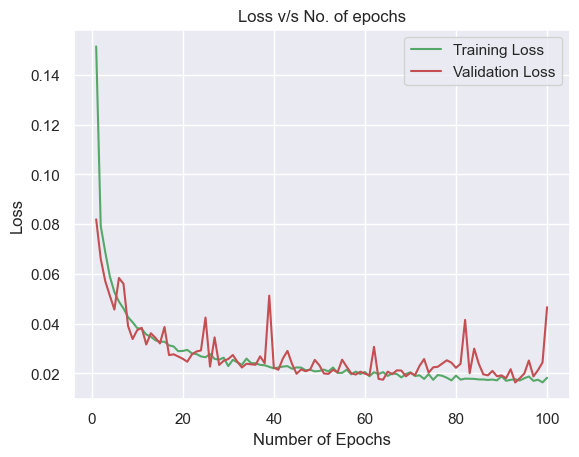

In [48]:
loss = history_org.history['loss']
val_loss = history_org.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Loss v/s No. of epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Plotting Accuracy v/s Epochs 

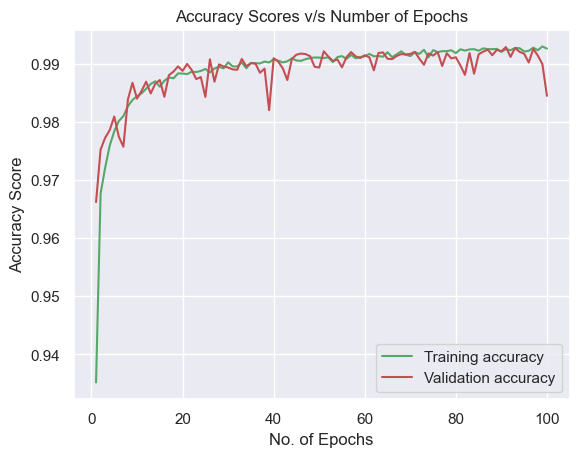

In [49]:
loss = history_org.history['accuracy']
val_loss = history_org.history['val_accuracy']
plt.plot(epochs, loss, 'g', label = 'Training accuracy')
plt.plot(epochs, val_loss, 'r', label = 'Validation accuracy')
plt.title('Accuracy Scores v/s Number of Epochs')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

## Model Evaluation 

In [50]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy of Deep neural Network : %.2f' % (accuracy*100))
Classifier_accuracy.append(accuracy*100)

974/974 [==============================] - 1s 704us/step - loss: 0.0466 - accuracy: 0.9845
Accuracy of Deep neural Network : 98.45


#### K-Nearest Neighbor Classifier

In [51]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
Classifier_accuracy.append(accuracy*100)
print("Accuracy of KNN Classifier : %.2f" % (accuracy*100))

Accuracy of KNN Classifier : 96.60


#### SVM Classifier

In [52]:
svc_clf = SVC() 
svc_clf.fit(X_train,y_train)
y_pred = svc_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
Classifier_accuracy.append(accuracy*100)
print("Accuracy of SVM Classifier : %.2f" % (accuracy*100) )

Accuracy of SVM Classifier : 97.30


#### Decision Tree Classifier

In [53]:
dt_clf = DecisionTreeClassifier(max_depth=5)
dt_clf.fit(X_train,y_train)
y_pred = dt_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
Classifier_accuracy.append(accuracy*100)
print("Accuracy of Decision Tree Classifier : %.2f" % (accuracy*100) )

Accuracy of Decision Tree Classifier : 96.53


#### Naive Bayes Classifier

In [54]:
nb_clf = CategoricalNB()
nb_clf.fit(X_train,y_train)
y_pred = nb_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
Classifier_accuracy.append(accuracy*100)
print("Accuracy of Naive Bayes Classifier : %.2f" % (accuracy*100) )

Accuracy of Naive Bayes Classifier : 71.36


#### Quadratic Discriminant Analysis Classifier

In [55]:
qda_clf=QuadraticDiscriminantAnalysis()
qda_clf.fit(X_train,y_train)
y_pred=qda_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
Classifier_accuracy.append(accuracy*100)
print("Accuracy of QDA Classifier : %.2f" % (accuracy*100))

Accuracy of QDA Classifier : 51.32


#### Stochastic Gradient Classifier

In [56]:
sgd_clf=SGDClassifier(loss="hinge", penalty="l2")
sgd_clf.fit(X_train,y_train)
y_pred=sgd_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
Classifier_accuracy.append(accuracy*100)
print("Accuracy of SGD Classifier : %.2f" % (accuracy*100))

Accuracy of SGD Classifier : 83.56


#### Logistic Regression 

In [57]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
y_pred=lr_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
Classifier_accuracy.append(accuracy*100)
print("Accuracy of Logistic Regression Classifier : %.2f" % (accuracy*100))

Accuracy of Logistic Regression Classifier : 83.55


#### XGBoost Classifier

In [58]:
xgb_clf=xgb.XGBClassifier(eval_metric = 'error',objective='binary:logistic',max_depth=2, learning_rate=0.1)
xgb_clf.fit(X_train,y_train)
y_pred=xgb_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
Classifier_accuracy.append(accuracy*100)
print("Accuracy of XGBoost Classifier : %.2f" % (accuracy*100))

Accuracy of XGBoost Classifier : 98.12


### Comparitive analysis of models

In [59]:
Classifier_names = ["DNN", "KNN", "RBF_SVM", "Decision Tree","Naive Bayes","Quadratic","SGD","Logistic Regression","XGBoost"]

In [60]:
df_clf = pd.DataFrame()
df_clf['name'] = Classifier_names
df_clf['Accuracy'] = Classifier_accuracy
df_clf = df_clf.sort_values(by=['Accuracy'], ascending=False)
df_clf.head(10)

,name,Accuracy
0,DNN,98.452747
8,XGBoost,98.115691
2,RBF_SVM,97.297124
1,KNN,96.603749
3,Decision Tree,96.533128
6,SGD,83.558038
7,Logistic Regression,83.554828
4,Naive Bayes,71.362994
5,Quadratic,51.316127


#### Visualize accuracies of the models

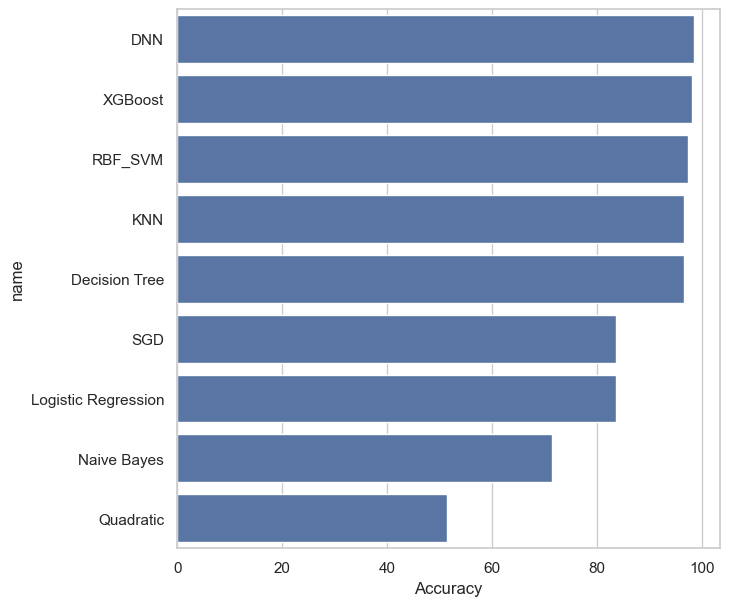

In [61]:
sns.set(style="whitegrid",rc={'figure.figsize':(7,7)})
ax = sns.barplot(y="name", x="Accuracy", data=df_clf)

In [62]:
print(f"The best baseline Classifier is {df_clf.name[0]} with an accuracy of {df_clf.Accuracy[0]}.")

The best baseline Classifier is DNN with an accuracy of 98.45274686813354.


## Hyperparameter tuning 

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

def model_builder(hp):
    model = keras.Sequential()
    
    # Tune the number of units in the first Dense layer
    hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
    model.add(layers.Dense(units=hp_units, activation='relu'))
    
    # Output layer (for binary classification)
    model.add(layers.Dense(1, activation='sigmoid'))

    # Tune the learning rate
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model  # ✅ Only return the compiled model


In [69]:
from keras_tuner.tuners import RandomSearch
tuner = RandomSearch(model_builder, objective='val_accuracy', max_trials=3, executions_per_trial=2, directory='ddos', project_name='ddos_isa', overwrite=True)

In [70]:
tuner.search_space_summary()

Search space summary
Default search space size: 2
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [71]:
tuner.search(X_train, y_train, epochs=100, validation_data=(X_test,y_test), batch_size = 32)

Trial 3 Complete [00h 08m 16s]
val_accuracy: 0.9942860901355743

Best val_accuracy So Far: 0.9943181872367859
Total elapsed time: 00h 25m 10s


In [72]:
tuner.results_summary()

Results summary
Results in ddos\ddos_isa
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0 summary
Hyperparameters:
units: 352
learning_rate: 0.01
Score: 0.9943181872367859

Trial 2 summary
Hyperparameters:
units: 224
learning_rate: 0.001
Score: 0.9942860901355743

Trial 1 summary
Hyperparameters:
units: 224
learning_rate: 0.01
Score: 0.9934996068477631


## Best Hyperparameters 

In [73]:
modified_model = tuner.get_best_models(num_models=1)[0]
modified_hparam=tuner.get_best_hyperparameters(num_trials=1)[0]
tuner.get_best_hyperparameters()[0].values

{'units': 352, 'learning_rate': 0.01}

## Model Evaluation

In [74]:
loss, accuracy = modified_model.evaluate(X_test, y_test)

974/974 [==============================] - 1s 723us/step - loss: 0.0228 - accuracy: 0.9944


## Get Best value for epoch 

In [75]:
model = tuner.hypermodel.build(modified_hparam)
history = model.fit(X_train, y_train, batch_size=32, epochs=100, verbose=1, validation_data=(X_test,y_test))
val_per_epoch = history.history['val_accuracy']
modified_epoch = val_per_epoch.index(max(val_per_epoch)) + 1
print('Best epoch value: %d' % (modified_epoch,))

Epoch 1/100
2272/2272 [==============================] - 3s 1ms/step - loss: 0.1358 - accuracy: 0.9434 - val_loss: 0.0772 - val_accuracy: 0.9720
Epoch 2/100
2272/2272 [==============================] - 3s 1ms/step - loss: 0.0754 - accuracy: 0.9703 - val_loss: 0.0570 - val_accuracy: 0.9786
Epoch 3/100
2272/2272 [==============================] - 3s 1ms/step - loss: 0.0631 - accuracy: 0.9751 - val_loss: 0.0604 - val_accuracy: 0.9763
Epoch 4/100
2272/2272 [==============================] - 3s 1ms/step - loss: 0.0511 - accuracy: 0.9798 - val_loss: 0.0515 - val_accuracy: 0.9779
Epoch 5/100
2272/2272 [==============================] - 3s 1ms/step - loss: 0.0475 - accuracy: 0.9812 - val_loss: 0.0471 - val_accuracy: 0.9814
Epoch 6/100
2272/2272 [==============================] - 2s 1ms/step - loss: 0.0427 - accuracy: 0.9826 - val_loss: 0.0429 - val_accuracy: 0.9832
Epoch 7/100
2272/2272 [==============================] - 2s 1ms/step - loss: 0.0413 - accuracy: 0.9831 - val_loss: 0.0376 - val_ac

## Plot of Loss v/s Epochs for hypermodel

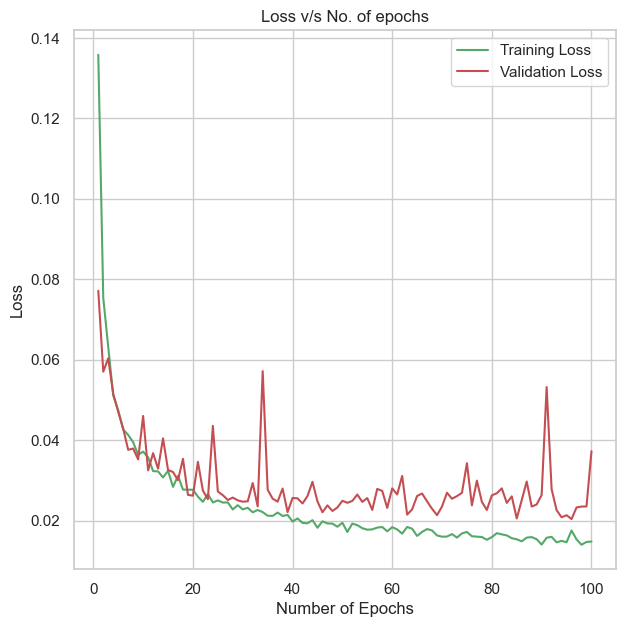

In [76]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Loss v/s No. of epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Plot for Accuracy v/s Epochs for hypermodel

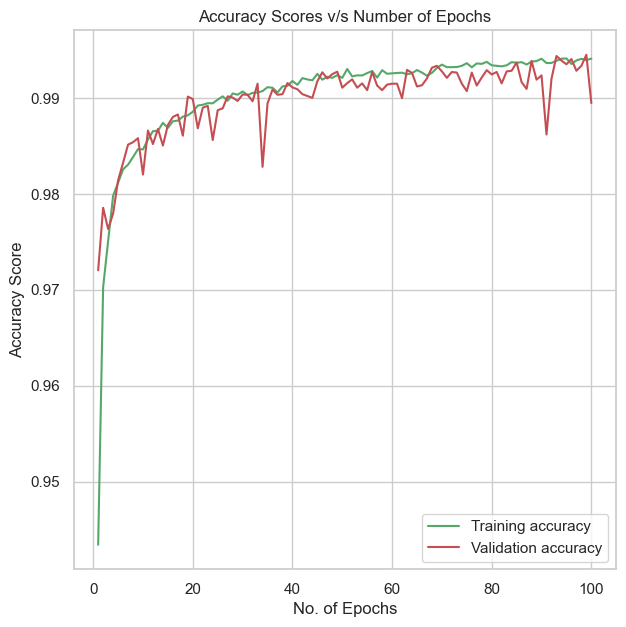

In [77]:
loss = history.history['accuracy']
val_loss = history.history['val_accuracy']
plt.plot(epochs, loss, 'g', label = 'Training accuracy')
plt.plot(epochs, val_loss, 'r', label = 'Validation accuracy')
plt.title('Accuracy Scores v/s Number of Epochs')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

## Final Model 

In [78]:
hypermodel = tuner.hypermodel.build(modified_hparam)

## Fitting the hypermodel 

In [79]:
hypermodel.fit(X_train, y_train, batch_size=32, epochs=modified_epoch, validation_data=(X_test, y_test), initial_epoch=0)

Epoch 1/99
2272/2272 [==============================] - 4s 1ms/step - loss: 0.1415 - accuracy: 0.9426 - val_loss: 0.0841 - val_accuracy: 0.9709
Epoch 2/99
2272/2272 [==============================] - 3s 1ms/step - loss: 0.0730 - accuracy: 0.9712 - val_loss: 0.0586 - val_accuracy: 0.9761
Epoch 3/99
2272/2272 [==============================] - 3s 1ms/step - loss: 0.0584 - accuracy: 0.9771 - val_loss: 0.0486 - val_accuracy: 0.9802
Epoch 4/99
2272/2272 [==============================] - 3s 1ms/step - loss: 0.0498 - accuracy: 0.9804 - val_loss: 0.0533 - val_accuracy: 0.9782
Epoch 5/99
2272/2272 [==============================] - 3s 1ms/step - loss: 0.0451 - accuracy: 0.9823 - val_loss: 0.0508 - val_accuracy: 0.9797
Epoch 6/99
2272/2272 [==============================] - 3s 1ms/step - loss: 0.0416 - accuracy: 0.9835 - val_loss: 0.0396 - val_accuracy: 0.9830
Epoch 7/99
2272/2272 [==============================] - 3s 1ms/step - loss: 0.0384 - accuracy: 0.9844 - val_loss: 0.0413 - val_accuracy:

In [80]:
hypermodel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 352)               20064     
                                                                 
 dense_5 (Dense)             (None, 1)                 353       
                                                                 
Total params: 20417 (79.75 KB)
Trainable params: 20417 (79.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Printing the final accuracy and loss values of the hypermodel 

In [81]:
result_final = hypermodel.evaluate(X_test, y_test, batch_size=32)
print("[Loss, Accuracy]:", result_final)

974/974 [==============================] - 1s 745us/step - loss: 0.0264 - accuracy: 0.9924
[Loss, Accuracy]: [0.02644997462630272, 0.9924242496490479]


## Making Sample Predictions 

In [82]:
classes = model.predict(X_test)
print(classes)

974/974 [==============================] - 1s 661us/step
[[1.0000000e+00]
 [2.0858747e-36]
 [1.1136893e-36]
 ...
 [0.0000000e+00]
 [0.0000000e+00]
 [1.3123499e-24]]


In [83]:
y_pred = []
for i in classes:
    if i > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [84]:
y_pred[:20]

[1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0]

In [85]:
y_test[:20]

6920      1
72624     0
28582     0
4404      1
89845     0
43293     0
102976    0
46537     1
23264     0
53992     0
12820     1
24052     1
40055     0
23133     1
18156     0
51917     0
33048     1
63282     0
51043     1
11932     0
Name: label, dtype: int64

## Classification Report 

In [86]:
print(classification_report(y_test, y_pred, target_names = labels))

              precision    recall  f1-score   support

      benign       0.99      1.00      0.99     18926
      malign       0.99      0.98      0.99     12226

    accuracy                           0.99     31152
   macro avg       0.99      0.99      0.99     31152
weighted avg       0.99      0.99      0.99     31152



## Plotting Confusion Matrix

In [87]:
from itertools import product
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(10,10))
    plt.grid(False)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    cm1 = cm
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] 
        thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, str(cm1[i, j])+ " ("+ str(cm[i, j]*100)+"%)",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

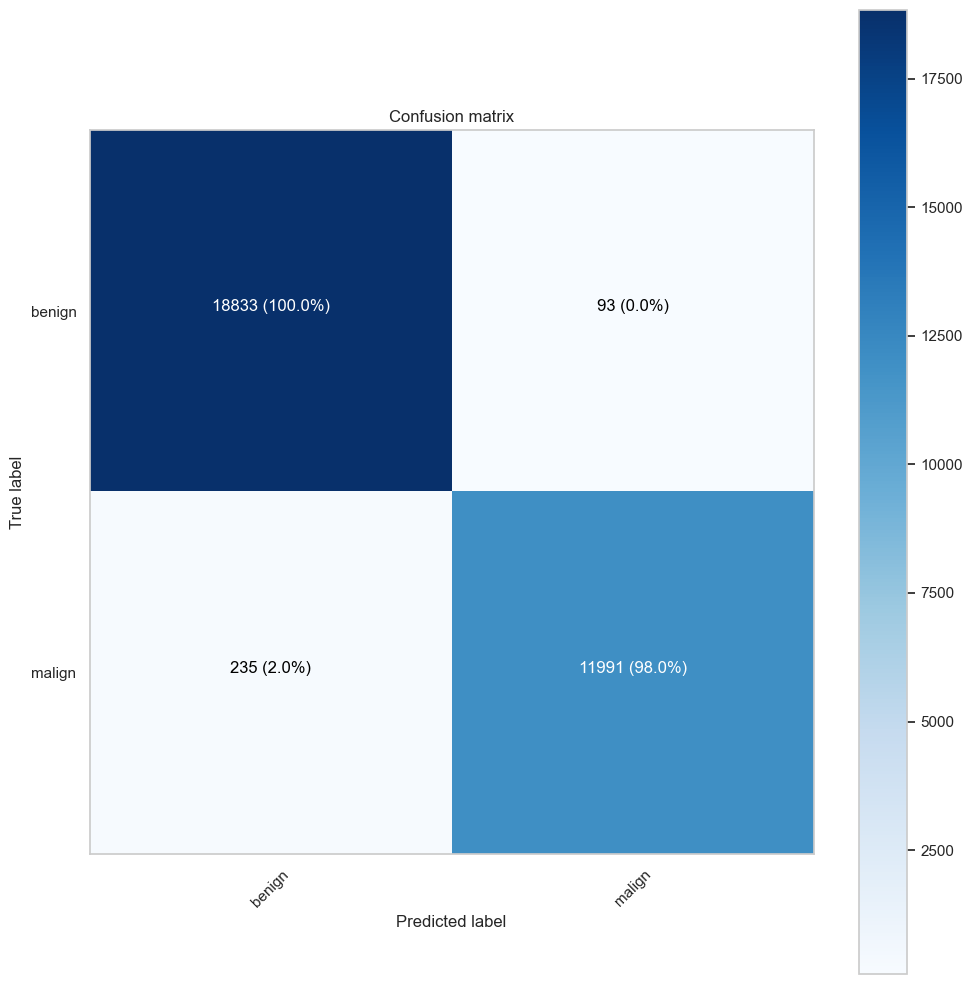

In [88]:
confusion_mtx = confusion_matrix(y_test, y_pred) 
plot_confusion_matrix(confusion_mtx, classes = labels)

## Displaying ROC-AUC curve

In [89]:
def model_builder_crv(X_train, X_test, y_train, y_test):
    model = keras.Sequential()
    
    model.add(Dense(28 , input_shape=(56,) , activation="relu" , name="Hidden_Layer_1"))
    model.add(Dense(10 , activation="relu" , name="Hidden_Layer_2"))
    model.add(Dense(1 , activation="sigmoid" , name="Output_Layer"))
    opt = keras.optimizers.Adam(learning_rate=0.01)
    
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC()])
    history = model.fit(X_train,y_train,epochs=100,verbose=0,callbacks=None,validation_data=(X_test,y_test))

    return history, model.layers, model

Area under the curve(AUC) is: 0.9997654342459673


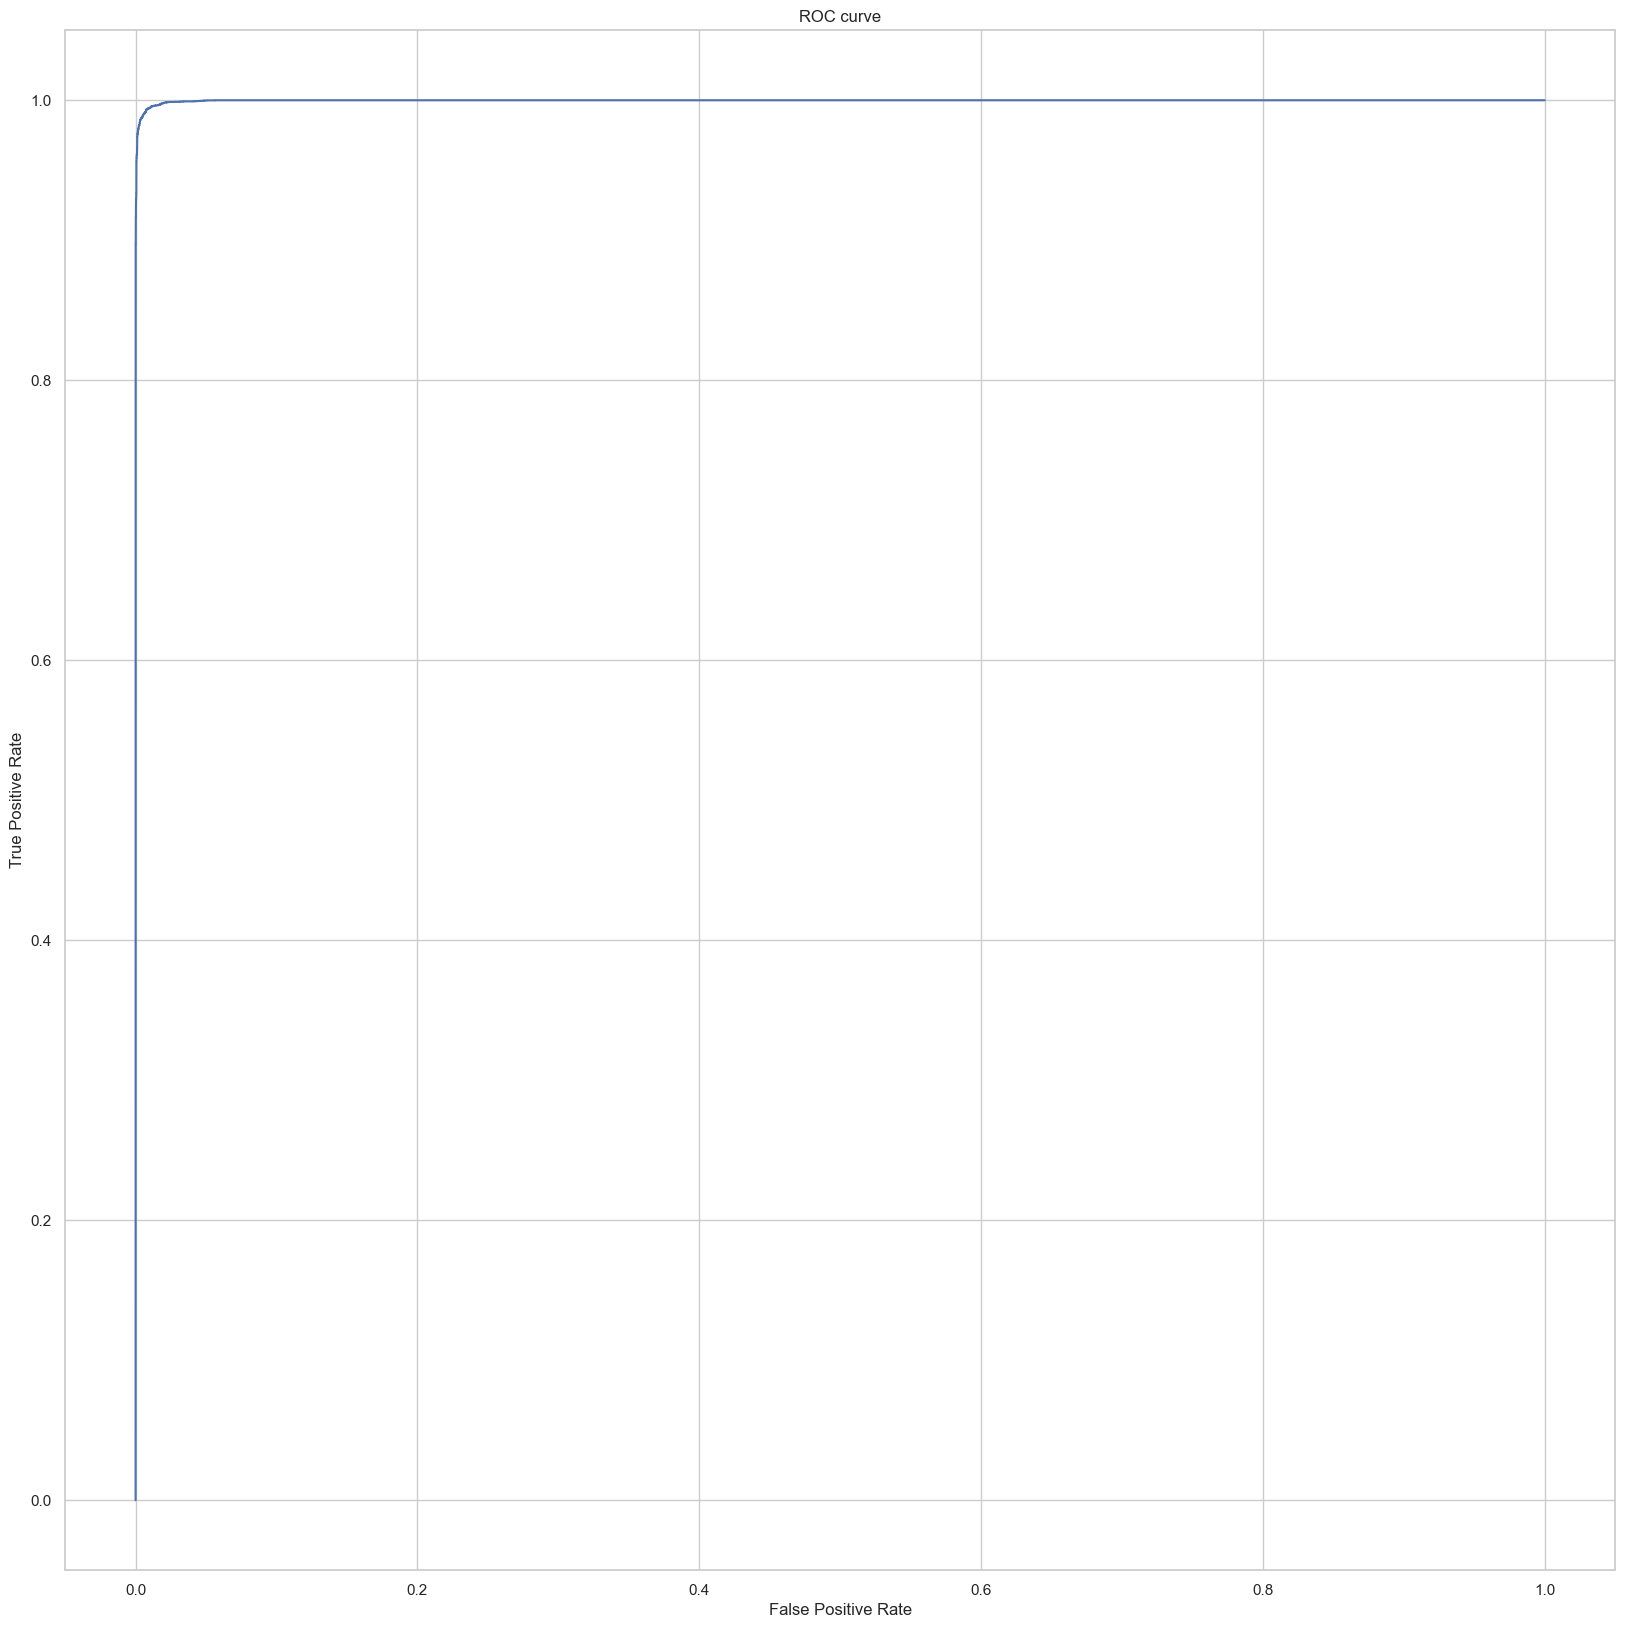

In [90]:
from sklearn.metrics import roc_curve, auc
plt.figure(figsize=(20,20))
history,model_layers,model = model_builder_crv(X_train, X_test, y_train, y_test)    
y_predicted = model(X_test)
fpr, tpr, keras_thr = roc_curve(y_test, y_predicted)
auc_crv = auc(fpr, tpr)
print(f"Area under the curve(AUC) is: {auc_crv}")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr, tpr)
plt.title("ROC curve")
plt.show()